<img src='https://github.com/Rogerio-mack/work/blob/main/figuras/logo_sbc.png?raw=true' width=250, align="right">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# **Case: JetRail**

Este é um cenário fictício de dados. Uma empresa de tecnologia erroviária, **JetRail**, desenvolveu uma tecnologia de propulsão para trens mais rápidos. O O investimento nessa tecnologia, entretant,  só parece viável houver um mínimo de um milhão de passageiros para os próximos dezoito meses. É necessário, então,avaliarmos a previsão do número de passageiros.

In [2]:
df = pd.read_csv('https://github.com/Introducao-Series-Temporais-em-Python/minicurso-SBC-SBSI-2024/raw/main/data/Train%20data.csv')

display(df.head())
print()
df.shape

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


(18288, 3)

# Ex1.

Inspecione os dados e faça um gráfico da série de dados.

In [3]:
df.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [4]:
df.index = pd.to_datetime(df['Datetime'],dayfirst=True) # or ,format='%d-%m-%Y %H:%M')
df = df.drop(columns=['ID','Datetime'])
df.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


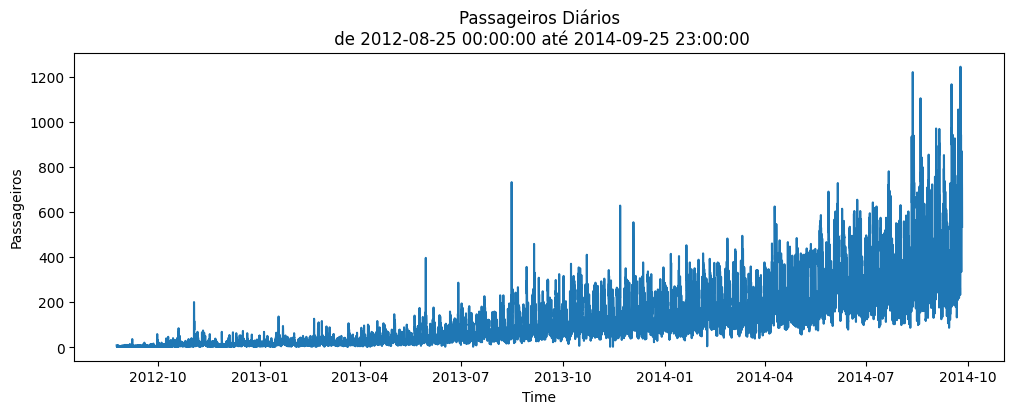

In [5]:
plt.figure(figsize=(12, 4))

plt.plot(df.index,df.Count)
plt.title ('Passageiros Diários\n de ' + str(df.index.min()) + ' até ' + str(df.index.max()))
plt.xlabel('Time')
plt.ylabel ('Passageiros')

plt.show()


# Ex2.

Verifique a presença de sazonalidades. Observe através de gráficos os valores médios agregados por mês, dia, hora e dia da semana (`weekday`).

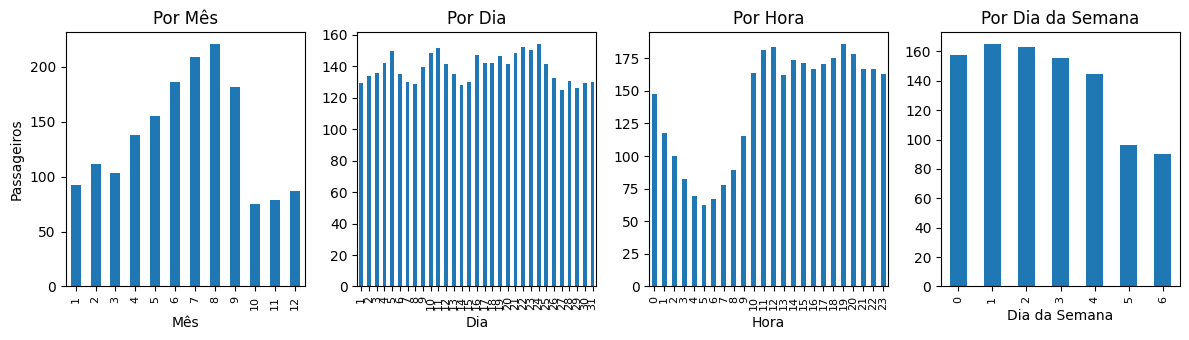

In [6]:
plt.figure(figsize=(12, 3.5))

plt.subplot(1,4,1)
df.groupby(df.index.month)['Count'].mean().plot(kind='bar')
plt.title('Por Mês')
plt.xlabel('Mês')
plt.ylabel ('Passageiros')
plt.xticks(fontsize=8)

plt.subplot(1,4,2)
df.groupby(df.index.day)['Count'].mean().plot(kind='bar')
plt.title('Por Dia')
plt.xlabel('Dia')
plt.xticks(fontsize=8)

plt.subplot(1,4,3)
df.groupby(df.index.hour)['Count'].mean().plot(kind='bar')
plt.title('Por Hora')
plt.xlabel('Hora')
plt.xticks(fontsize=8)

plt.subplot(1,4,4)
df.groupby(df.index.weekday)['Count'].mean().plot(kind='bar')
plt.title('Por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.xticks(fontsize=8)

plt.tight_layout()
plt.show()



,frequencies,spectrum,periods
1,1.0,8938.876569,18288.000000
2,2.0,2480.780290,9144.000000
762,762.0,1469.039224,24.000000
3,3.0,1272.088375,6096.000000
109,109.0,722.035841,167.779817


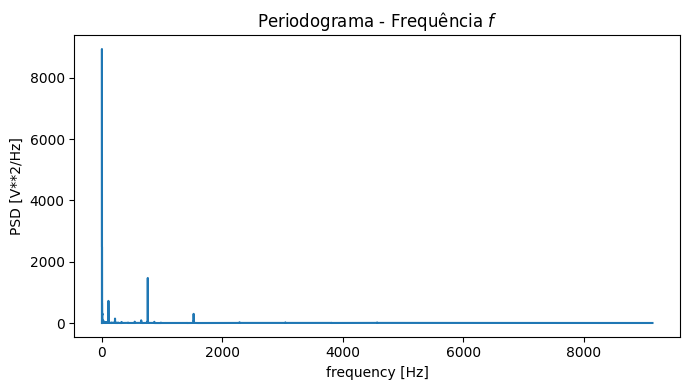

In [7]:
from scipy import signal
fig, ax = plt.subplots(figsize=(7,4))

frequencies, spectrum = signal.periodogram(df['Count'],fs=len(df))

ax.step(frequencies, spectrum)

ax.set_title('Periodograma - Frequência $f$')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('PSD [V**2/Hz]')

dfft = pd.DataFrame()
dfft['frequencies'], dfft['spectrum'] = frequencies, spectrum
dfft['periods'] = len(df) / dfft['frequencies']
display(dfft.sort_values('spectrum',ascending=False).head())

plt.tight_layout()
plt.show()

# Ex3.

Empregue a função `resample()` (pacote `pandas`) para reconstruir a série para a média dos valores diários. Exiba os valores em um gráfico sobre os valores originais.

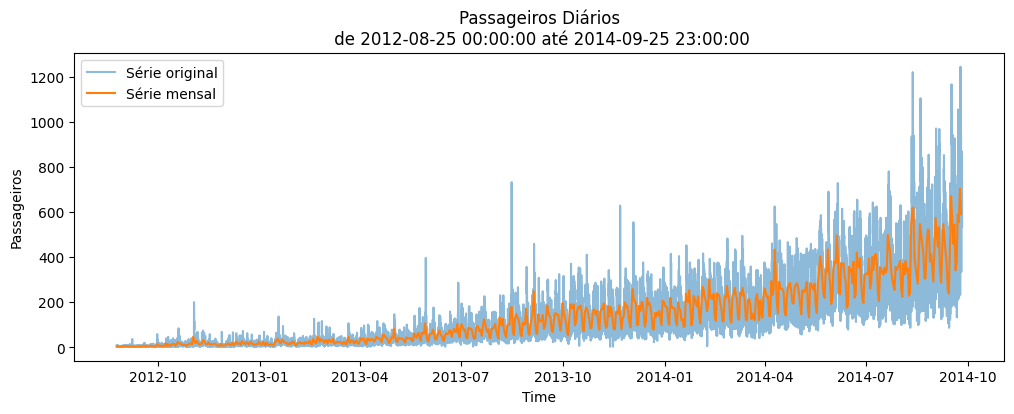

In [18]:
df_diario = df.resample('D').mean()

plt.figure(figsize=(12, 4))

plt.plot(df.index,df.Count,label='Série original',alpha=0.5)
plt.plot(df_diario.index,df_diario.Count,label='Série mensal')
plt.title ('Passageiros Diários\n de ' + str(df.index.min()) + ' até ' + str(df.index.max()))
plt.xlabel('Time')
plt.ylabel ('Passageiros')
plt.legend()

plt.show()


# Ex4.

Empregue a função `seasonal_decompose`(pacote `statsmodels`) para decompor a série dos valores diários e mostre a distribuição dos resíduos.

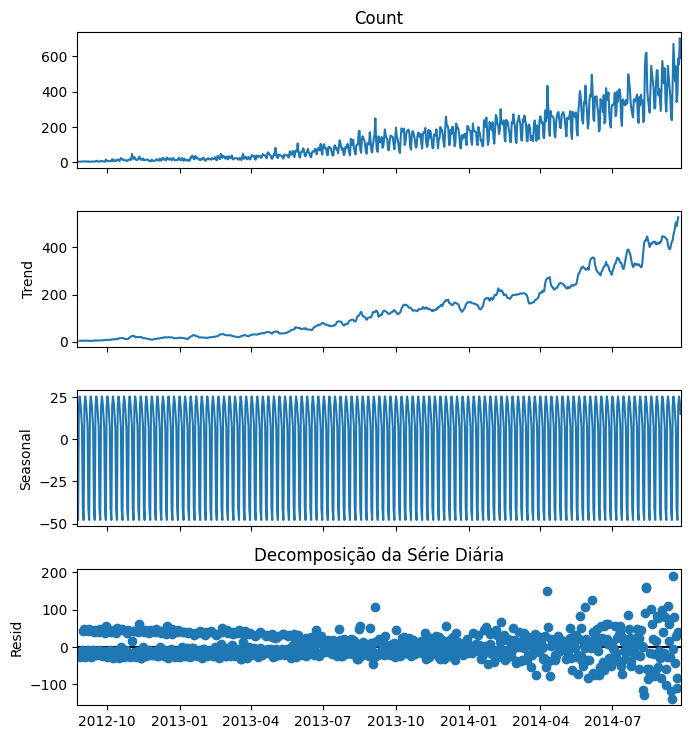

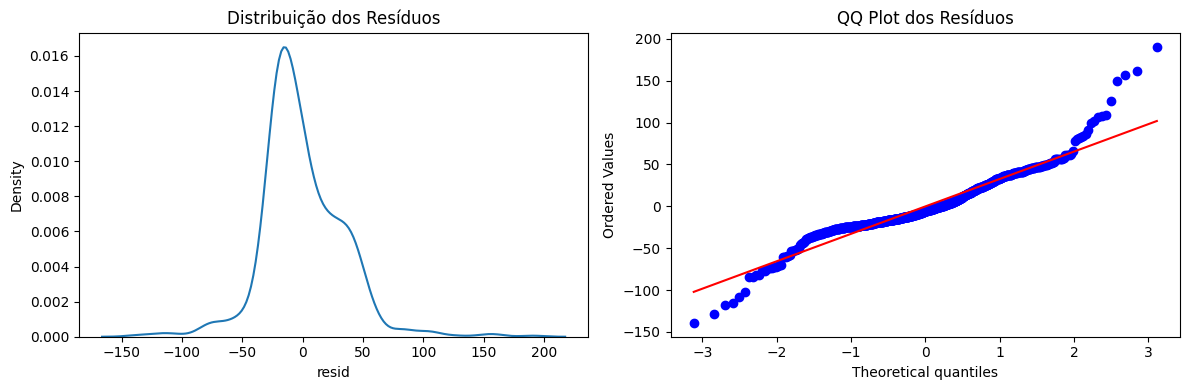

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy.stats as stats

result = seasonal_decompose(df_diario['Count'])

fig = result.plot()
fig.set_size_inches((7, 8))
plt.title('Decomposição da Série Diária')
plt.show()


fig, ax = plt.subplots(1,2,figsize=(12, 4))

sns.kdeplot(result.resid,ax=ax[0])
ax[0].set_title('Distribuição dos Resíduos')

stats.probplot(result.resid.dropna(), dist="norm", plot=ax[1])
ax[1].set_title('QQ Plot dos Resíduos')

plt.tight_layout()
plt.show()

